In [1]:
import os
os.chdir('../../')
!pwd

/root/python/myenv/medical-coding-reproducibility-main


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Plot showing the distribution of ICD-9 and ICD-10 codes in MIMIC-IV


mimiciv_hosp = pd.read_csv(
    "./dataset/mimiciv/hosp/diagnoses_icd.csv.gz",
    compression="gzip",
)

sns.set_theme("paper", style="whitegrid", palette="colorblind", font_scale=1.5)


แปลผลว่า เมื่อเราพยายาม สนใจ code เพื่อทำนายมากขึ้น โอกาสที่จะหาเจอ code เหล่านั้น จะน้อยลงไปเรื่อยๆ

In [3]:
mimiciv_hosp

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10000032,22595853,1,5723,9
1,10000032,22595853,2,78959,9
2,10000032,22595853,3,5715,9
3,10000032,22595853,4,07070,9
4,10000032,22595853,5,496,9
...,...,...,...,...,...
4756321,19999987,23865745,7,41401,9
4756322,19999987,23865745,8,78039,9
4756323,19999987,23865745,9,0413,9
4756324,19999987,23865745,10,36846,9


In [4]:
icd9_counts = mimiciv_hosp[mimiciv_hosp.icd_version == 9].icd_code.value_counts()
icd10_counts = mimiciv_hosp[mimiciv_hosp.icd_version == 10].icd_code.value_counts()


/tmp/ipykernel_49820/3043626543.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_49820/3043626543.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=65)


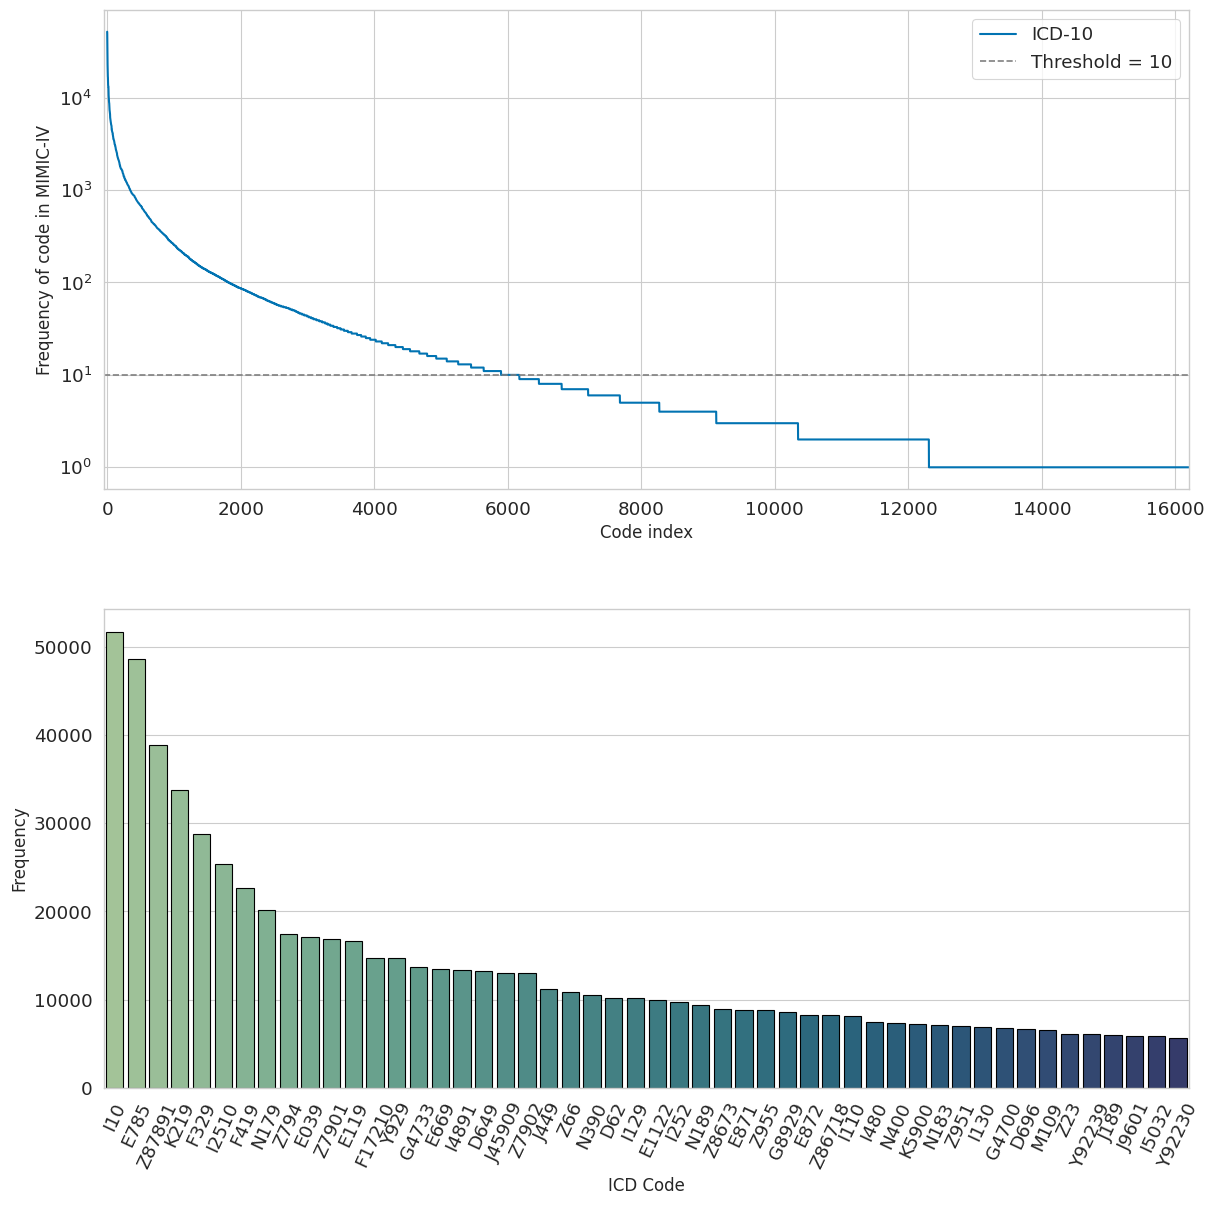

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming icd10_counts is a Pandas Series with ICD codes as index and frequency as values
# Convert the Series to a DataFrame for easier manipulation
icd10_counts_df = icd10_counts.reset_index()
icd10_counts_df.columns = ['icd_code', 'count']

# Optional: Display only the top N ICD codes (e.g., top 50) to make the plot more readable
top_n = 50
icd10_counts_top = icd10_counts_df.head(top_n)


# Create a figure with 2 rows and 1 column, and add space between plots
fig, axes = plt.subplots(
    2, 
    1, 
    figsize=(14, 14), 
    gridspec_kw={'height_ratios': [0.15, 0.15], 'hspace': 0.25},  # Adjust height and space
    constrained_layout=False
)


# First subplot: Line plot for all ICD-10 counts
sns.lineplot(
    x=np.linspace(0, len(icd10_counts) - 1, len(icd10_counts)),
    y=icd10_counts.values,
    label="ICD-10",
    linewidth=1.5,
    ax=axes[0]
)
axes[0].set_yscale("log")  # Logarithmic scale for y-axis
axes[0].set_xlabel("Code index", fontsize=12)
axes[0].set_ylabel("Frequency of code in MIMIC-IV", fontsize=12)
axes[0].axhline(10, linestyle="dashed", color="gray", label="Threshold = 10")  # Horizontal dashed line
axes[0].set_xlim(-50, 16200)
axes[0].legend()
#axes[0].set_title('ICD-10 Code Frequency Distribution', fontsize=14)

# Second subplot: Bar plot for top 50 ICD codes
sns.barplot(
    data=icd10_counts_top, 
    x='icd_code', 
    y='count', 
    palette='crest', 
    edgecolor='black', 
    ax=axes[1]
)
#axes[1].set_title('Top 50 ICD-10 Codes by Frequency', fontsize=14)
axes[1].set_xlabel('ICD Code', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=65)

# Save the combined plot
fig.savefig('./files/retrieval/combined_icd10_frequency.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
